## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


In [21]:
# Your code here - remember to use markdown cells for comments as well!

In [5]:
import pandas as pd
import sqlite3
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
# You'll need to unzip the db locally.
conn = sqlite3.connect('zippedData/im.db')

# Habib Khadri

# Nick Kirbabas

# Seerat Mutneja

# Sidhya Raman

# Douglas Riggs

In [6]:
# Reading table names
pd.read_sql('''
SELECT 
    name
FROM 
    sqlite_schema
WHERE 
    type ='table' AND 
    name NOT LIKE 'sqlite_%';
''',conn)
#Adding a comment to initialize my branch

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


## Function Definitions

In [7]:
# Used to convert Dollar value ($123,456,789) into int (123456789)
def dollar_string_to_int(cash_string):
    cash_string = cash_string.strip('$')
    cash_string = cash_string.replace(',', '')
    return int(cash_string)

## PART 1: Separating out by Genre

### Join IMDB with TN Movie Budgets and do some cleaning

In [38]:
# Reading and joining 2 tables from im.db. Left join, since we won't actually
# be using the rating/numvotes
imdb_df = pd.read_sql('''
SELECT DISTINCT movie_id, primary_title, genres, averagerating, numvotes
FROM movie_basics
LEFT JOIN movie_ratings
    USING (movie_id)
''',conn)

In [39]:
# Check Column names/number of values
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   movie_id       146144 non-null  object 
 1   primary_title  146144 non-null  object 
 2   genres         140736 non-null  object 
 3   averagerating  73856 non-null   float64
 4   numvotes       73856 non-null   float64
dtypes: float64(2), object(3)
memory usage: 5.6+ MB


In [40]:
# Filter out non-english movies, since we're an American studio. 
# We will leave in movies without specified languages, since many of them
# seem to be in english
# imdb_df.language = imdb_df.language.fillna('unknown')
# imdb_df = imdb_df[(imdb_df.language == 'en') | (imdb_df.language == 'unknown')]
# imdb_df.drop_duplicates().head(50)

In [41]:
# Read data from tn.movie_budgets csv
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [42]:
# Check info
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [45]:
# Joining the imdb df and the tn df on movie name.
imdb_df = imdb_df.set_index('primary_title')
tn_movie_budgets_df = tn_movie_budgets_df.set_index('movie')
imdb_tn_df = imdb_df.join(tn_movie_budgets_df, how='inner')
imdb_df = imdb_df.reset_index()
tn_movie_budgets_df = tn_movie_budgets_df.reset_index()
imdb_tn_df = imdb_tn_df.reset_index()
imdb_tn_df.columns = ['primary_title', 'movie_id', 'genres', 'averagerating', 'numvotes', 'id',
       'release_date', 'production_budget', 'domestic_gross',
       'worldwide_gross']

In [46]:
# Take a peek at the resulting table
imdb_tn_df.head(10)

,primary_title,movie_id,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
0,#Horror,tt3526286,"Crime,Drama,Horror",3.0,3092.0,16,"Nov 20, 2015","$1,500,000",$0,$0
1,10 Cloverfield Lane,tt1179933,"Drama,Horror,Mystery",7.2,260383.0,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422"
2,10 Days in a Madhouse,tt3453052,Drama,6.7,1114.0,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616"
3,12 Rounds,tt3517850,"Action,Drama,Romance",8.1,11.0,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648"
4,12 Strong,tt1413492,"Action,Drama,History",6.6,50155.0,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378"
5,12 Years a Slave,tt2024544,"Biography,Drama,History",8.1,577301.0,18,"Oct 18, 2013","$20,000,000","$56,671,993","$181,025,343"
6,127 Hours,tt1542344,"Adventure,Biography,Drama",7.6,323949.0,6,"Nov 5, 2010","$18,000,000","$18,335,230","$60,217,171"
7,13 Sins,tt2059171,"Horror,Thriller",6.3,29550.0,51,"Apr 18, 2014","$4,000,000","$9,134","$47,552"
8,1982,tt2388621,Drama,7.0,221.0,23,"Mar 1, 2016","$1,000,000",$0,$0
9,1982,tt5671400,Documentary,NaN,NaN,23,"Mar 1, 2016","$1,000,000",$0,$0


In [47]:
# And check columns/number of values
imdb_tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      3815 non-null   object 
 1   movie_id           3815 non-null   object 
 2   genres             3743 non-null   object 
 3   averagerating      2875 non-null   float64
 4   numvotes           2875 non-null   float64
 5   id                 3815 non-null   int64  
 6   release_date       3815 non-null   object 
 7   production_budget  3815 non-null   object 
 8   domestic_gross     3815 non-null   object 
 9   worldwide_gross    3815 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 298.2+ KB


In [48]:
# Convert $ strings to ints
imdb_tn_df['production_budget'] = imdb_tn_df\
                                        .production_budget\
                                        .map(dollar_string_to_int)
imdb_tn_df['domestic_gross'] = imdb_tn_df\
                                        .domestic_gross\
                                        .map(dollar_string_to_int)
imdb_tn_df['worldwide_gross'] = imdb_tn_df\
                                        .worldwide_gross\
                                        .map(dollar_string_to_int)

In [49]:
imdb_tn_df.head()

,primary_title,movie_id,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
0,#Horror,tt3526286,"Crime,Drama,Horror",3.0,3092.0,16,"Nov 20, 2015",1500000,0,0
1,10 Cloverfield Lane,tt1179933,"Drama,Horror,Mystery",7.2,260383.0,54,"Mar 11, 2016",5000000,72082999,108286422
2,10 Days in a Madhouse,tt3453052,Drama,6.7,1114.0,48,"Nov 11, 2015",12000000,14616,14616
3,12 Rounds,tt3517850,"Action,Drama,Romance",8.1,11.0,37,"Mar 27, 2009",20000000,12234694,17306648
4,12 Strong,tt1413492,"Action,Drama,History",6.6,50155.0,64,"Jan 19, 2018",35000000,45819713,71118378


In [50]:
# Merge in TMDB to get language
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [51]:
imdb_tn_df = imdb_tn_df.set_index('primary_title')
tmdb_movies_df = tmdb_movies_df.set_index('title')
imdb_tn_tmdb_df = imdb_tn_df.join(tmdb_movies_df, how='left', lsuffix='_left', rsuffix='_right')
imdb_tn_df = imdb_tn_df.reset_index()
tmdb_movies_df = tmdb_movies_df.reset_index()
imdb_tn_tmdb_df = imdb_tn_tmdb_df.reset_index()
imdb_tn_tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5374 entries, 0 to 5373
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               5374 non-null   object 
 1   movie_id            5374 non-null   object 
 2   genres              5275 non-null   object 
 3   averagerating       3813 non-null   float64
 4   numvotes            3813 non-null   float64
 5   id_left             5374 non-null   int64  
 6   release_date_left   5374 non-null   object 
 7   production_budget   5374 non-null   int64  
 8   domestic_gross      5374 non-null   int64  
 9   worldwide_gross     5374 non-null   int64  
 10  Unnamed: 0          4550 non-null   float64
 11  genre_ids           4550 non-null   object 
 12  id_right            4550 non-null   float64
 13  original_language   4550 non-null   object 
 14  original_title      4550 non-null   object 
 15  popularity          4550 non-null   float64
 16  releas

In [57]:
# Filter out non-english movies
imdb_tn_tmdb_df = imdb_tn_tmdb_df[imdb_tn_tmdb_df.original_language == 'en']

In [64]:
imdb_tn_tmdb_df.reset_index()
imdb_tn_tmdb_df.columns = ['primary_title', 'movie_id', 'genres', 'averagerating', 'numvotes', 'id_left',
       'release_date_left', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'Unnamed: 0', 'genre_ids', 'id_right',
       'original_language', 'original_title', 'popularity',
       'release_date_right', 'vote_average', 'vote_count']

In [98]:
# Drop duplicate movies based on movie name
imdb_tn_tmdb_df = imdb_tn_tmdb_df.drop_duplicates(subset=["primary_title"], keep='first')

Now, the imdb_tn_df should be usable for analysis!

### Group based by Genre, Create visuals for that

In [303]:
# Splitting the genre column into separate rows for each listed genre
imdb_tn_df = imdb_tn_tmdb_df.reset_index()
imdb_tn_split_df = imdb_tn_df
imdb_tn_split_df = pd.DataFrame({'genres':imdb_tn_split_df.genres.str.split(','), 'movie':imdb_tn_split_df.primary_title}, ).explode('genres')

In [304]:
# Check that the result looks as expected
imdb_tn_split_df.head(4)

,genres,movie
0,Drama,10 Cloverfield Lane
0,Horror,10 Cloverfield Lane
0,Mystery,10 Cloverfield Lane
1,Drama,10 Days in a Madhouse


In [305]:
# Join back with the original dataframe to get the rest of the columns, 
# since we only have genre and movie name.
imdb_tn_split_df = imdb_tn_split_df.set_index('movie');
imdb_tn_df = imdb_tn_df.set_index('primary_title')
imdb_tn_split_df = imdb_tn_split_df\
.join(imdb_tn_df, how='inner', lsuffix='_separated', rsuffix='_original')
imdb_tn_split_df.reset_index()
imdb_tn_df.reset_index();

In [306]:
# Check the result
imdb_tn_split_df.head()

,genres_separated,index,movie_id,genres_original,averagerating,numvotes,id_left,release_date_left,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_right,original_language,original_title,popularity,release_date_right,vote_average,vote_count
10 Cloverfield Lane,Drama,1,tt1179933,"Drama,Horror,Mystery",7.2,260383.0,54,"Mar 11, 2016",5000000,72082999,108286422,17422.0,"[53, 878, 18]",333371.0,en,10 Cloverfield Lane,17.892,2016-03-11,6.9,4629.0
10 Cloverfield Lane,Horror,1,tt1179933,"Drama,Horror,Mystery",7.2,260383.0,54,"Mar 11, 2016",5000000,72082999,108286422,17422.0,"[53, 878, 18]",333371.0,en,10 Cloverfield Lane,17.892,2016-03-11,6.9,4629.0
10 Cloverfield Lane,Mystery,1,tt1179933,"Drama,Horror,Mystery",7.2,260383.0,54,"Mar 11, 2016",5000000,72082999,108286422,17422.0,"[53, 878, 18]",333371.0,en,10 Cloverfield Lane,17.892,2016-03-11,6.9,4629.0
10 Days in a Madhouse,Drama,2,tt3453052,Drama,6.7,1114.0,48,"Nov 11, 2015",12000000,14616,14616,15907.0,[18],345003.0,en,10 Days in a Madhouse,0.955,2015-11-20,5.4,7.0
12 Strong,Action,4,tt1413492,"Action,Drama,History",6.6,50155.0,64,"Jan 19, 2018",35000000,45819713,71118378,24032.0,"[10752, 18, 36, 28]",429351.0,en,12 Strong,13.183,2018-01-19,5.6,1312.0


In [307]:
# Create some additional columns of interest
imdb_tn_split_df['genre_amount'] =\ 
    imdb_tn_split_df.genres_original.apply(lambda x: len(str(x).split(',')))
imdb_tn_split_df['net_profit'] = \
    imdb_tn_split_df.worldwide_gross - imdb_tn_split_df.production_budget
imdb_tn_split_df['profit_ratio'] = \
    imdb_tn_split_df.net_profit / imdb_tn_split_df.production_budget

In [308]:
# Group by genre. Use aggregate functions on columns of interest
genre_df = imdb_tn_split_df.groupby('genres_separated').agg({
    'numvotes': ['mean', 'median'],
    'production_budget': ['mean', 'median'],
    'domestic_gross': ['mean', 'median'],
    'worldwide_gross': ['mean', 'median'],
    'profit_ratio': ['mean', 'median'],
    'net_profit': ['mean', 'median'],
    'genre_amount': 'mean',
    'movie_id': 'count'
})

In [309]:
# Take a look at the full dataframe.
genre_df

numvotes           production_budget            \
                           mean    median              mean    median   
genres_separated                                                        
Action            175450.756818  111213.0      7.727444e+07  55000000   
Adventure         195871.394203  110824.0      1.019245e+08  94000000   
Animation         111787.930000   66459.5      9.442871e+07  80000000   
Biography         101857.250000   40389.5      2.464528e+07  19550000   
Comedy             83370.828413   45048.5      3.645903e+07  21500000   
Crime             102619.031496   56390.5      3.073738e+07  25000000   
Documentary         6048.203125     389.0      1.252569e+07   4500000   
Drama              85439.407047   38667.0      2.504896e+07  15000000   
Family             67448.802083   20284.5      5.727350e+07  35000000   
Fantasy           143013.208000   92709.0      8.096339e+07  50000000   
History            82443.000000   29339.5      2.968302e+07  20000000   
Horror             55407.687500   31888.0      1.783684e+07   5000000   
Music              70319.170213   29725.0      1.742840e+07  14750000   
Musical            43864.000000    4696.5      3.712222e+07  20000000   
Mystery           122601.946565   57184.0      2.304798e+07  10000000   
News                  31.000000      31.0      1.200000e+07  12000000   
Romance            73637.228155   48703.0      2.157101e+07  15000000   
Sci-Fi            244729.262069  126203.0      8.054786e+07  40000000   
Sport              55981.305556   18222.0      2.572432e+07  16000000   
Thriller          100988.681818   46789.0      2.923762e+07  15000000   
War                63807.550000   11338.0      2.620000e+07  18250000   
Western           167567.916667   25997.5      4.896429e+07  21500000   

                 domestic_gross              worldwide_gross               \
                           mean       median            mean       median   
genres_separated                                                            
Action             8.486925e+07   44806783.0    2.327987e+08  111336398.0   
Adventure          1.198010e+08   76223578.0    3.391583e+08  219535492.0   
Animation          1.327468e+08  107518682.0    3.640968e+08  310660018.0   
Biography          3.455836e+07   15980282.0    7.052881e+07   26707684.5   
Comedy             5.307517e+07   30932113.0    1.194786e+08   50145607.0   
Crime              3.333862e+07   17506470.0    7.489653e+07   31559560.0   
Documentary        1.852250e+07    3011019.0    3.295582e+07    5856562.0   
Drama              3.064247e+07   12725614.0    6.630400e+07   22415535.0   
Family             6.296921e+07   42401897.0    1.541430e+08   64607491.5   
Fantasy            7.487388e+07   36392502.0    2.214095e+08   85287417.0   
History            3.216614e+07    8323085.0    6.718325e+07   25187026.0   
Horror             2.737165e+07   11007361.0    6.579135e+07   17805622.5   
Music              3.235017e+07   15497396.5    7.045783e+07   22631155.0   
Musical            5.305524e+07   23364784.0    1.235229e+08   38164784.0   
Mystery            3.506539e+07   20180155.0    8.164029e+07   38359310.0   
News               6.730578e+06    6730578.0    4.673058e+07   46730578.0   
Romance            3.211901e+07   16609678.5    6.775460e+07   25504270.0   
Sci-Fi             1.093624e+08   49053070.5    2.998050e+08  127082857.0   
Sport              3.839230e+07   14394097.0    7.870429e+07   21867665.0   
Thriller           3.704906e+07   18790874.5    9.716602e+07   36318741.5   
War                2.179058e+07    3610391.0    5.251120e+07    7023622.5   
Western            3.788040e+07    1600111.0    8.233669e+07    3227776.0   

                 profit_ratio              net_profit               \
                         mean    median          mean       median   
genres_separated                                                     
Action               1.657758  1.094614  1.555242e+08   50131

In [310]:
# Flatten column names
genre_df.columns = genre_df.columns.get_level_values(1) + '_' + genre_df.columns.get_level_values(0)

In [311]:
genre_df.columns

Index(['mean_numvotes', 'median_numvotes', 'mean_production_budget',
       'median_production_budget', 'mean_domestic_gross',
       'median_domestic_gross', 'mean_worldwide_gross',
       'median_worldwide_gross', 'mean_profit_ratio', 'median_profit_ratio',
       'mean_net_profit', 'median_net_profit', 'mean_genre_amount',
       'count_movie_id'],
      dtype='object')

In [312]:
#  Change the name of the movie_id column, which was used to count the number of movies in the genre
genre_df.columns = ['mean_numvotes', 'median_numvotes', 'mean_production_budget',
       'median_production_budget', 'mean_domestic_gross',
       'median_domestic_gross', 'mean_worldwide_gross',
       'median_worldwide_gross', 'mean_profit_ratio', 'median_profit_ratio',
       'mean_net_profit', 'median_net_profit', 'mean_genre_amount',
       'movie_count'];
# Remove genres with really low samples (< 30 movies)
genre_df = genre_df[(genre_df.movie_count >= 10)].copy()

In [313]:
# Divide columns by 1000000 to easily display values in millions
genre_df['mean_net_profit'] = genre_df['mean_net_profit'] / 1000000
genre_df['median_net_profit'] = genre_df['median_net_profit'] / 1000000

In [314]:
# Set up styling for graphs
sns.set_theme()
sns.set_style('darkgrid')

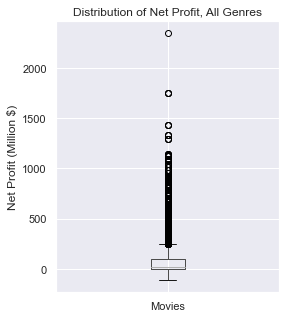

In [338]:
# Create a box and whiskers plot of median profit, to see what the distribution of values looks like
fig, ax = plt.subplots(figsize=(4,5))
millions_df = imdb_tn_split_df[['genres_separated', 'net_profit']].copy()
millions_df.net_profit = millions_df.net_profit / 1000000
millions_df.columns = ['genres_separated', 'Movies']
millions_df\
.boxplot(column='Movies', ax=ax)
ax.set(title='Distribution of Net Profit per movie, All Genres',\
       ylabel='Net Profit (Million $)');


Seems like there are lots of outliers! For our genre graphs we can use the median to mitigate the effect of the outliers.

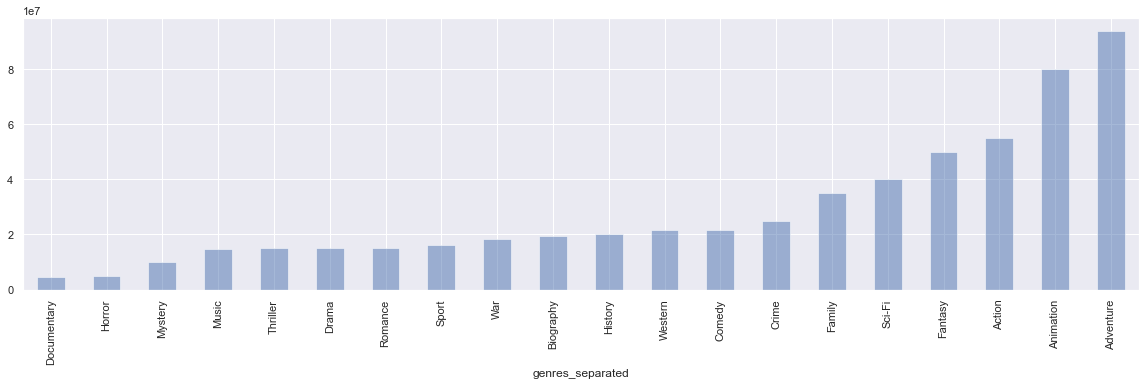

In [223]:
# Graph of how much a movie in each genre cost by median value
fig, ax = plt.subplots(figsize=(20,5))
genre_df.sort_values('median_production_budget').median_production_budget.plot.bar(ax=ax, alpha = .5);

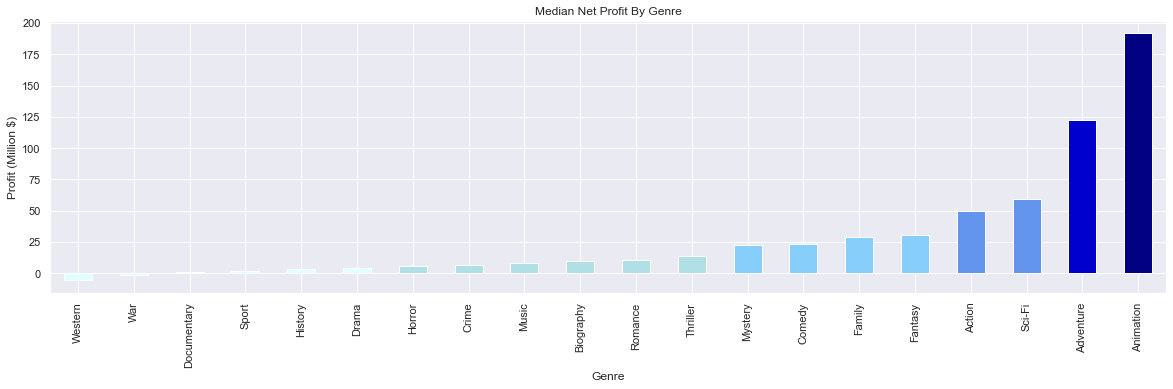

In [272]:
# Graph of how much profit a movie in each genre made, by median value
fig, ax = plt.subplots(figsize=(20,5))
genre_df = genre_df.sort_values('median_net_profit')
net_profit = genre_df.median_net_profit
net_profit.plot.bar(ax=ax, color=\
     ["lightcyan" if (x < net_profit.quantile(.3)) \
      else 'powderblue' if (x < net_profit.quantile(.6))
      else 'lightskyblue' if (x < net_profit.quantile(.8))
      else 'cornflowerblue' if (x < net_profit.quantile(.9))
      else 'mediumblue' if (x < net_profit.quantile(.95))
      else 'navy' for x in net_profit]);
ax.set(title='Median Net Profit By Genre', xlabel='Genre', ylabel='Profit (Million $)');

Seems like Animation, Adventure, and Sci-Fi made the most profit-wise. However, Animation studios are radically different from other animation studios, and have a high barrier to entry. So we can focus on the next 3 highest genres, Adventure, Sci-Fi, and Action. Earlier, in our production budget graphs, those were some of the highest cost genres. Maybe we can check the profit ratio, to see if they are money sinks or not.

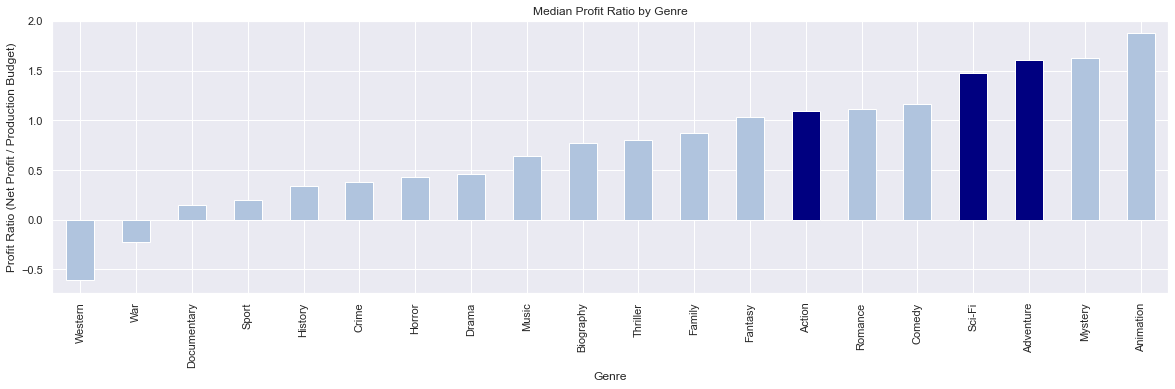

In [341]:
fig, ax = plt.subplots(figsize=(20,5))
genre_df = genre_df.sort_values('median_profit_ratio')
genre_df.median_profit_ratio.plot.bar(ax=ax, color=\
     ["navy" if (x == 'Action' or x == 'Sci-Fi' or x == 'Adventure' ) \
      else 'lightsteelblue' for x in genre_df.index]);
ax.set(title='Median Profit Ratio by Genre', xlabel='Genre', ylabel='Profit Ratio (Net Profit / Production Budget)');

Looks like they aren't so bad! While they aren't the top options, all 3 categories are in the top third by profit ratio, meaning that they shouldn't be too horribly inefficient with relation to money put in. Now, we can be more confident that our Adventure, Sci-Fi, or Action movie has a high liklihood of generating money!

## PART 2: File Exploration

In [14]:
bom_movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [15]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [161]:
rt_movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_movie_info_df.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [17]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [19]:
rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t',\
                            encoding = 'unicode_escape')
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [20]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [21]:
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [26]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [22]:
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [27]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     5782 non-null   int64 
 1   release_date           5782 non-null   object
 2   movie                  5782 non-null   object
 3   production_budget      5782 non-null   object
 4   domestic_gross         5782 non-null   object
 5   worldwide_gross        5782 non-null   object
 6   num_production_budget  5782 non-null   int64 
 7   num_domestic_gross     5782 non-null   int64 
 8   num_worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 406.7+ KB


In [30]:
imdb_df = pd.read_sql('''
SELECT *
FROM movie_basics
INNER JOIN movie_ratings
    USING (movie_id)
''',conn)
imdb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [31]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


## PART 3: Cleaning/Small graphs for budget/gross

In [59]:
def dollar_string_to_int(cash_string):
    cash_string = cash_string.strip('$')
    cash_string = cash_string.replace(',', '')
    return int(cash_string)

clean_budgets_df = tn_movie_budgets_df
clean_budgets_df['num_production_budget'] = clean_budgets_df\
                                                .production_budget\
                                                .map(dollar_string_to_int)
clean_budgets_df['num_domestic_gross'] = clean_budgets_df\
                                                .domestic_gross\
                                                .map(dollar_string_to_int)
clean_budgets_df['num_worldwide_gross'] = clean_budgets_df\
                                                .worldwide_gross\
                                                .map(dollar_string_to_int)

clean_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,num_production_budget,num_domestic_gross,num_worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,620181382,1316721747


In [24]:

# fig, ax = plt.subplots(figsize=(20,5))
# ax2 = ax.twinx()
sns.scatterplot(x=tn_movie_budgets_df['production_budget'], y=tn_movie_budgets_df['domestic_gross']);
# sns.scatterplot(ax=ax, data=tn_movie_budgets_df, x='production_budget', y='domestic_gross');
# movie_df.averagerating.plot(ax=ax, stacked=True);
# movie_df.numvotes.plot(ax=ax2, stacked=True, color='red');

# grouped_movies_by_genre.sort_values('average_rating').average_rating\
# .plot.bar(ax=ax, alpha = .5);
# grouped_movies_by_genre.sort_values('average_rating').movies_in_genre\
# .plot.bar(ax=ax2, color='red', alpha=.5);
# ax.figure.legend();

Error in callback <function flush_figures at 0x7fafb0e071f0> (for post_execute):


KeyboardInterrupt: 

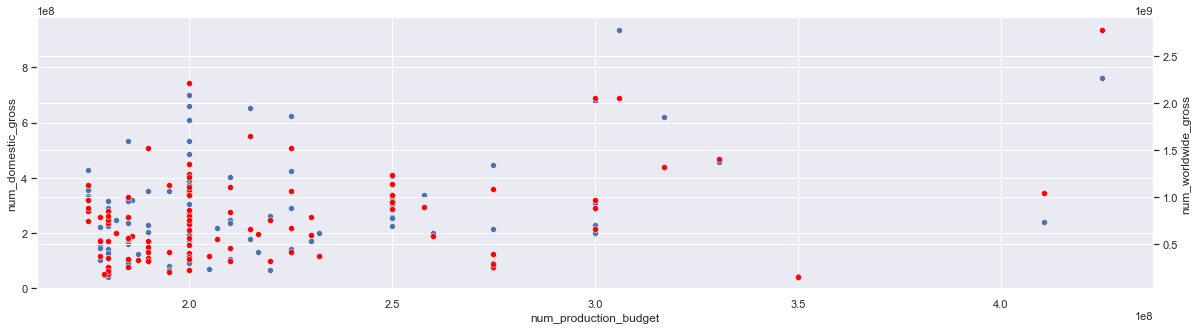

In [25]:
fig, ax = plt.subplots(figsize=(20,5))
ax2 = ax.twinx()
scatterplot = \
    sns.scatterplot(x=clean_budgets_df.head(100)['num_production_budget'],\
                    y=clean_budgets_df.head(100)['num_domestic_gross'],\
                   ax=ax);
scatterplot = \
    sns.scatterplot(x=clean_budgets_df.head(100)['num_production_budget'],\
                    y=clean_budgets_df.head(100)['num_worldwide_gross'],\
                   ax=ax2,\
                   color='red');
# ax.legend()
# ax2.legend()
# plt.plot([0, 0], [400000000, 400000000], linewidth=10)
# plt.plot([0, 0], [400000000, 400000000], linewidth=10)
# g = sns.scatterplot(data = df, y  = s_y, x = s_x)
# ax.set_xticks([0,10,20,30,40,50,60,70,80,90])
# ax.set_yticks([0,10,20,30,40,50,60,70,80,90])
# ax.set_xticklabels(['0','a','b','c','d','e'])




In [259]:
clean_budgets_df['profit_gross'] = clean_budgets_df.num_worldwide_gross - clean_budgets_df.num_production_budget
clean_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,num_production_budget,num_domestic_gross,num_worldwide_gross,profit_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,620181382,1316721747,999721747


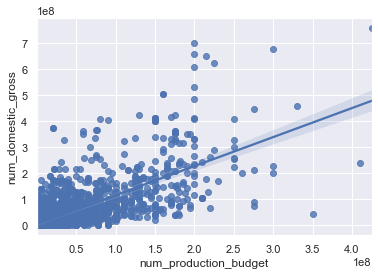

In [526]:
sns.regplot(x="num_production_budget",
            y="num_domestic_gross", 
            data=imdb_tn_df);

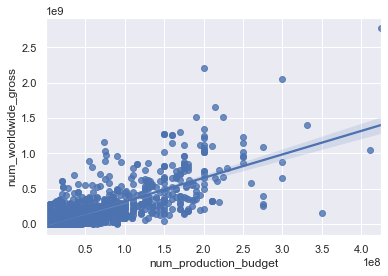

In [530]:
sns.regplot(x="num_production_budget",
            y="num_worldwide_gross", 
            data=imdb_tn_df);

In [531]:
imdb_tn_df.corr()

,start_year,runtime_minutes,averagerating,numvotes,id,num_production_budget,num_domestic_gross,num_worldwide_gross
start_year,1.000000,0.065830,0.053334,-0.088208,0.017262,0.034132,0.040294,0.034316
runtime_minutes,0.065830,1.000000,0.211844,0.363359,-0.037219,0.246496,0.195526,0.208363
averagerating,0.053334,0.211844,1.000000,0.311527,0.010373,0.130967,0.177163,0.165675
numvotes,-0.088208,0.363359,0.311527,1.000000,-0.005445,0.500550,0.562929,0.560203
id,0.017262,-0.037219,0.010373,-0.005445,1.000000,-0.046256,-0.005244,-0.020881
num_production_budget,0.034132,0.246496,0.130967,0.500550,-0.046256,1.000000,0.715272,0.777815
num_domestic_gross,0.040294,0.195526,0.177163,0.562929,-0.005244,0.715272,1.000000,0.946496
num_worldwide_gross,0.034316,0.208363,0.165675,0.560203,-0.020881,0.777815,0.946496,1.000000


### Metric/success indicator ideas

## Experimentation

In [162]:
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [169]:
tn_movie_budgets_df.head()
def dollar_string_to_int(cash_string):
    cash_string = cash_string.strip('$')
    cash_string = cash_string.replace(',', '')
    return int(cash_string)

clean_budgets_df = tn_movie_budgets_df
clean_budgets_df['num_production_budget'] = clean_budgets_df\
                                                .production_budget\
                                                .map(dollar_string_to_int)
clean_budgets_df['num_domestic_gross'] = clean_budgets_df\
                                                .domestic_gross\
                                                .map(dollar_string_to_int)
clean_budgets_df['num_worldwide_gross'] = clean_budgets_df\
                                                .worldwide_gross\
                                                .map(dollar_string_to_int)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [180]:
# tmdb_movies_df.set_index('original_title')
# tn_movie_budgets_df.set_index('movie')
# tmdb_movies_df.reset_index()
# tn_movie_budgets_df.reset_index()
tmdb_tn_df = tmdb_movies_df.join(clean_budgets_df,  how='inner', lsuffix='_tmdb', rsuffix='_original')
tmdb_tn_df.head()

,Unnamed: 0,genre_ids,id_tmdb,original_language,original_title,popularity,release_date_tmdb,title,vote_average,vote_count,id_original,release_date_original,movie,production_budget,domestic_gross,worldwide_gross,num_production_budget,num_domestic_gross,num_worldwide_gross
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,760507625,2776345279
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,241063875,1045663875
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,42762350,149762350
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,459005868,1403013963
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,620181382,1316721747


## Person Exploration

In [264]:
character_df = pd.read_sql('''
SELECT *
FROM principals
INNER JOIN persons
    USING (person_id)
INNER JOIN movie_basics
    USING (movie_id)
INNER JOIN movie_ratings
    USING (movie_id)
''',conn)
character_df.head(50)

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0323808,10,nm0059247,editor,None,None,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
1,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
2,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]",Henry Garrett,NaN,NaN,actor,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
3,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.0,NaN,"actor,soundtrack,director",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
4,tt0323808,4,nm0502652,actress,None,"[""Lady Delia Morrison""]",Jacqueline Leonard,1967.0,NaN,actress,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
5,tt0323808,5,nm0362736,director,None,None,Robin Hardy,1929.0,2016.0,"actor,writer,director",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
6,tt0323808,6,nm0811056,producer,producer,None,Peter Snell,1938.0,NaN,"producer,soundtrack,executive",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
7,tt0323808,7,nm0914939,producer,producer,None,Peter Watson-Wood,NaN,NaN,"producer,production_manager",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
8,tt0323808,8,nm0779346,composer,None,None,John Scott,1930.0,NaN,"music_department,soundtrack,composer",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
9,tt0323808,9,nm0676104,cinematographer,None,None,Jan Pester,NaN,NaN,"camera_department,cinematographer,assistant_di...",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328


In [265]:
def list_from_string(list_string):
    list_string = str(list_string).strip('[]')
    return list_string.split(',')
list_from_string('[test, t123]')

['test', ' t123']

In [266]:
character_df.characters = character_df.characters.map(list_from_string)
character_df.head()

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0323808,10,nm0059247,editor,None,[None],Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
1,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
2,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]",Henry Garrett,NaN,NaN,actor,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
3,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.0,NaN,"actor,soundtrack,director",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
4,tt0323808,4,nm0502652,actress,None,"[""Lady Delia Morrison""]",Jacqueline Leonard,1967.0,NaN,actress,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328


In [269]:
character_df = character_df.set_index('primary_title')
tn_movie_budgets_df = tn_movie_budgets_df.set_index('movie')
char_budg_df = character_df.join(tn_movie_budgets_df, how='inner')
character_df = character_df.reset_index()
tn_movie_budgets_df = tn_movie_budgets_df.reset_index()
print(char_budg_df.info())
char_budg_df = char_budg_df.reset_index()
char_budg_df.columns = ['movie_title', 'movie_id', 'ordering', 'person_id', 'category', 'job',
       'characters', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes', 'id', 'release_date',
       'production_budget', 'domestic_gross', 'worldwide_gross']
char_budg_df.head(10)



<class 'pandas.core.frame.DataFrame'>
Index: 27145 entries, #Horror to xXx: Return of Xander Cage
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            27145 non-null  object 
 1   ordering            27145 non-null  int64  
 2   person_id           27145 non-null  object 
 3   category            27145 non-null  object 
 4   job                 8821 non-null   object 
 5   characters          27145 non-null  object 
 6   primary_name        27145 non-null  object 
 7   birth_year          13917 non-null  float64
 8   death_year          539 non-null    float64
 9   primary_profession  26876 non-null  object 
 10  original_title      27145 non-null  object 
 11  start_year          27145 non-null  int64  
 12  runtime_minutes     26168 non-null  float64
 13  genres              27085 non-null  object 
 14  averagerating       27145 non-null  float64
 15  numvotes            27145 non-n

,movie_title,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,...,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
0,#Horror,tt3526286,10,nm7724675,composer,None,[None],Leif Shackelford,NaN,NaN,...,2015,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015","$1,500,000",$0,$0
1,#Horror,tt3526286,1,nm6344380,actress,None,"[""Sam""]",Sadie Seelert,NaN,NaN,...,2015,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015","$1,500,000",$0,$0
2,#Horror,tt3526286,2,nm4239131,actress,None,"[""Cat""]",Haley Murphy,NaN,NaN,...,2015,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015","$1,500,000",$0,$0
3,#Horror,tt3526286,3,nm5376482,actress,None,"[""Sofia""]",Bridget McGarry,NaN,NaN,...,2015,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015","$1,500,000",$0,$0
4,#Horror,tt3526286,4,nm6344381,actress,None,"[""Ava""]",Blue Lindeberg,NaN,NaN,...,2015,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015","$1,500,000",$0,$0
5,#Horror,tt3526286,5,nm0836964,director,None,[None],Tara Subkoff,1972.0,NaN,...,2015,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015","$1,500,000",$0,$0
6,#Horror,tt3526286,6,nm4509944,producer,producer,[None],Jason Ludman,NaN,NaN,...,2015,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015","$1,500,000",$0,$0
7,#Horror,tt3526286,7,nm2592905,producer,producer,[None],Oren Segal,NaN,NaN,...,2015,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015","$1,500,000",$0,$0
8,#Horror,tt3526286,8,nm2553586,producer,producer,[None],Brendan Walsh,NaN,NaN,...,2015,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015","$1,500,000",$0,$0
9,#Horror,tt3526286,9,nm7724674,composer,None,[None],Erika M. Anderson,NaN,NaN,...,2015,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015","$1,500,000",$0,$0


In [271]:
char_budg_df['production_budget'] = char_budg_df.production_budget.apply(dollar_string_to_int)
char_budg_df['worldwide_gross'] = char_budg_df.worldwide_gross.apply(dollar_string_to_int)
char_budg_df['profit_gross'] = char_budg_df.worldwide_gross - char_budg_df.production_budget
char_budg_df.head()

,movie_title,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,...,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,profit_gross
0,#Horror,tt3526286,10,nm7724675,composer,None,[None],Leif Shackelford,NaN,NaN,...,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015",1500000,$0,0,-1500000
1,#Horror,tt3526286,1,nm6344380,actress,None,"[""Sam""]",Sadie Seelert,NaN,NaN,...,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015",1500000,$0,0,-1500000
2,#Horror,tt3526286,2,nm4239131,actress,None,"[""Cat""]",Haley Murphy,NaN,NaN,...,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015",1500000,$0,0,-1500000
3,#Horror,tt3526286,3,nm5376482,actress,None,"[""Sofia""]",Bridget McGarry,NaN,NaN,...,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015",1500000,$0,0,-1500000
4,#Horror,tt3526286,4,nm6344381,actress,None,"[""Ava""]",Blue Lindeberg,NaN,NaN,...,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015",1500000,$0,0,-1500000


In [284]:
multiple_character_df = char_budg_df[char_budg_df.characters.str.len() > 1]
single_character_df = char_budg_df[(char_budg_df.characters.str.len() == 1) \
   & (char_budg_df.category == 'actress') \
   | (char_budg_df.characters.str.len() == 1) \
   & (char_budg_df.category == 'actor')]
non_actor_df = char_budg_df[(char_budg_df.characters.str.len() == 1) \
   & (char_budg_df.category != 'actress') & (char_budg_df.category != 'actor')]


In [289]:
single_character_df.head()

,movie_title,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,...,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,profit_gross
1,#Horror,tt3526286,1,nm6344380,actress,None,"[""Sam""]",Sadie Seelert,NaN,NaN,...,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015",1500000,$0,0,-1500000
2,#Horror,tt3526286,2,nm4239131,actress,None,"[""Cat""]",Haley Murphy,NaN,NaN,...,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015",1500000,$0,0,-1500000
3,#Horror,tt3526286,3,nm5376482,actress,None,"[""Sofia""]",Bridget McGarry,NaN,NaN,...,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015",1500000,$0,0,-1500000
4,#Horror,tt3526286,4,nm6344381,actress,None,"[""Ava""]",Blue Lindeberg,NaN,NaN,...,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015",1500000,$0,0,-1500000
11,10 Cloverfield Lane,tt1179933,1,nm0000422,actor,None,"[""Howard""]",John Goodman,1952.0,NaN,...,103.0,"Drama,Horror,Mystery",7.2,260383,54,"Mar 11, 2016",5000000,"$72,082,999",108286422,103286422


In [313]:
non_actor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16122 entries, 0 to 27144
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16122 non-null  object 
 1   movie_id            16122 non-null  object 
 2   ordering            16122 non-null  int64  
 3   person_id           16122 non-null  object 
 4   category            16122 non-null  object 
 5   job                 8821 non-null   object 
 6   characters          16122 non-null  object 
 7   primary_name        16122 non-null  object 
 8   birth_year          6110 non-null   float64
 9   death_year          437 non-null    float64
 10  primary_profession  15923 non-null  object 
 11  original_title      16122 non-null  object 
 12  start_year          16122 non-null  int64  
 13  runtime_minutes     15653 non-null  float64
 14  genres              16103 non-null  object 
 15  averagerating       16122 non-null  float64
 16  numv

In [315]:
multiple_character_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 606 to 26999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         347 non-null    object 
 1   movie_id            347 non-null    object 
 2   ordering            347 non-null    int64  
 3   person_id           347 non-null    object 
 4   category            347 non-null    object 
 5   job                 0 non-null      object 
 6   characters          347 non-null    object 
 7   primary_name        347 non-null    object 
 8   birth_year          272 non-null    float64
 9   death_year          5 non-null      float64
 10  primary_profession  331 non-null    object 
 11  original_title      347 non-null    object 
 12  start_year          347 non-null    int64  
 13  runtime_minutes     339 non-null    float64
 14  genres              347 non-null    object 
 15  averagerating       347 non-null    float64
 16  numv

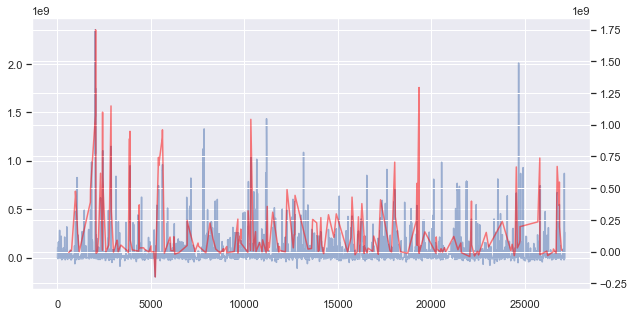

In [294]:
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
single_character_df.profit_gross.plot(ax=ax, alpha=.5);
multiple_character_df.profit_gross.plot(ax=ax2, color='red', alpha=.5);
# ax.figure.legend();

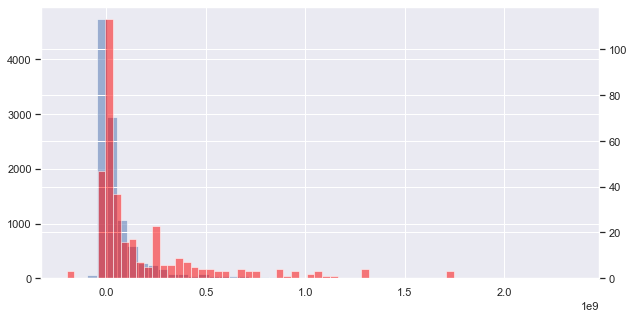

In [359]:
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
single_character_df.profit_gross.hist(ax=ax, alpha=.5, bins=50);
multiple_character_df.profit_gross.hist(ax=ax2, color='red', alpha=.5, bins=50);

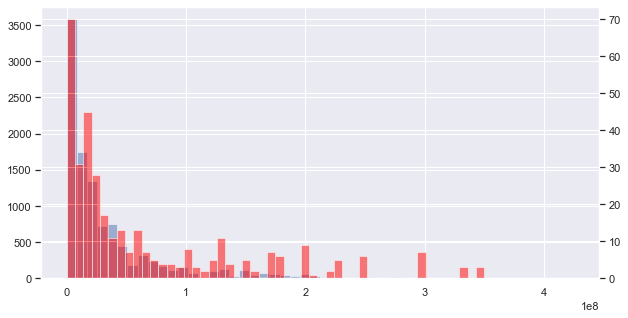

In [360]:
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
single_character_df.production_budget.hist(ax=ax, alpha=.5, bins=50);
multiple_character_df.production_budget.hist(ax=ax2, color='red', alpha=.5, bins=50);

In [362]:
print(single_character_df.profit_gross.mean())
print(multiple_character_df.profit_gross.mean())

67202191.08027351
185629655.648415


In [297]:
stats.ttest_ind(single_character_df.profit_gross, multiple_character_df.profit_gross)

Ttest_indResult(statistic=-12.279148523315971, pvalue=1.967453387917422e-34)

In [366]:
single_char_age_df = single_character_df.groupby('birth_year').agg({
    'runtime_minutes':'mean',
    'numvotes':'mean',
    'production_budget': 'mean',
    'worldwide_gross':'mean',
    'profit_gross':'mean',
    'movie_id':'count'
})
multiple_char_age_df = multiple_character_df.groupby('birth_year').agg({
    'runtime_minutes':'mean',
    'numvotes':'mean',
    'production_budget': 'mean',
    'worldwide_gross':'mean',
    'profit_gross':'mean',
    'movie_id':'count'
})
non_actor_age_df = non_actor_df.groupby('birth_year').agg({
    'runtime_minutes':'mean',
    'numvotes':'mean',
    'production_budget': 'mean',
    'worldwide_gross':'mean',
    'profit_gross':'mean',
    'movie_id':'count'
})

In [351]:
single_char_age_df.head()

,runtime_minutes,numvotes,production_budget,worldwide_gross,profit_gross,movie_id
birth_year,,,,,,
1917.0,84.000000,286.00,21750000.0,2.892609e+07,7.176088e+06,2
1922.0,126.000000,284869.00,180000000.0,1.800478e+08,4.778400e+04,1
1923.0,100.000000,123.00,1200000.0,0.000000e+00,-1.200000e+06,1
1925.0,101.750000,51365.25,64875000.0,2.591235e+08,1.942485e+08,4
1927.0,105.333333,37094.00,10120000.0,4.296120e+07,3.284120e+07,3


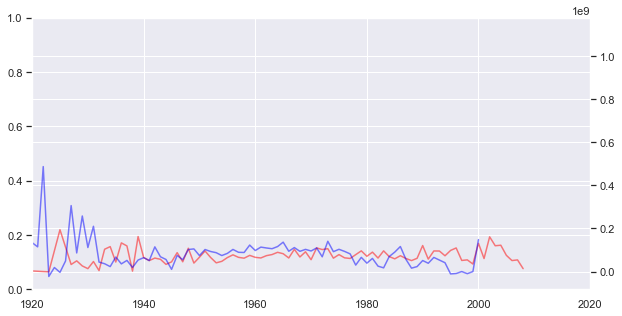

In [357]:
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
plt.xlim([1920, 2020])
# single_char_age_df.profit_gross.plot(ax=ax, alpha=.5);
single_char_age_df.profit_gross.plot(ax=ax2, color='red', alpha=.5);
non_actor_age_df.profit_gross.plot(ax=ax2, color='blue', alpha=.5);

In [364]:
char_budg_df.head()

,movie_title,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,...,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,profit_gross
0,#Horror,tt3526286,10,nm7724675,composer,None,[None],Leif Shackelford,NaN,NaN,...,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015",1500000,$0,0,-1500000
1,#Horror,tt3526286,1,nm6344380,actress,None,"[""Sam""]",Sadie Seelert,NaN,NaN,...,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015",1500000,$0,0,-1500000
2,#Horror,tt3526286,2,nm4239131,actress,None,"[""Cat""]",Haley Murphy,NaN,NaN,...,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015",1500000,$0,0,-1500000
3,#Horror,tt3526286,3,nm5376482,actress,None,"[""Sofia""]",Bridget McGarry,NaN,NaN,...,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015",1500000,$0,0,-1500000
4,#Horror,tt3526286,4,nm6344381,actress,None,"[""Ava""]",Blue Lindeberg,NaN,NaN,...,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015",1500000,$0,0,-1500000


In [385]:
actor_actress_df = char_budg_df[(char_budg_df.category == 'actress') | (char_budg_df.category == 'actor')]
director_producer_df = char_budg_df[(char_budg_df.category == 'director') | (char_budg_df.category == 'producer')]

In [386]:
by_actor_df = actor_actress_df.groupby('primary_name').agg({
    'runtime_minutes':'mean',
    'numvotes':'mean',
    'production_budget': 'mean',
    'worldwide_gross':'mean',
    'profit_gross':'mean',
    'movie_id':'count'
})
by_actor_df = by_actor_df.reset_index()

In [387]:
by_director_df = director_producer_df.groupby('primary_name').agg({
    'runtime_minutes':'mean',
    'numvotes':'mean',
    'production_budget': 'mean',
    'worldwide_gross':'mean',
    'profit_gross':'mean',
    'movie_id':'count'
})

In [388]:
by_actor_df.head(10)

,primary_name,runtime_minutes,numvotes,production_budget,worldwide_gross,profit_gross,movie_id
0,50 Cent,127.5,140617.5,50000000.0,9.193368e+07,4.193368e+07,2
1,A.J. Buckley,89.0,1317.0,2500000.0,0.000000e+00,-2.500000e+06,1
2,A.J. DeLucia,80.0,196.0,75000.0,0.000000e+00,-7.500000e+04,1
3,AJ Bowen,95.0,79451.0,1000000.0,2.688718e+07,2.588718e+07,1
4,AJ Michalka,107.0,161790.5,25850000.0,1.302400e+08,1.043900e+08,2
5,Aamir Khan,166.5,82052.0,16750000.0,1.531891e+08,1.364391e+08,2
6,Aanchal Sabharwal,NaN,117.0,5800000.0,6.800000e+06,1.000000e+06,1
7,Aarif Rahman,92.0,75.0,150000000.0,1.272470e+09,1.122470e+09,1
8,Aaron Burns,99.5,50783.5,1500000.0,9.629968e+06,8.129968e+06,2
9,Aaron Dean Eisenberg,NaN,9.0,5000000.0,6.750500e+04,-4.932495e+06,1


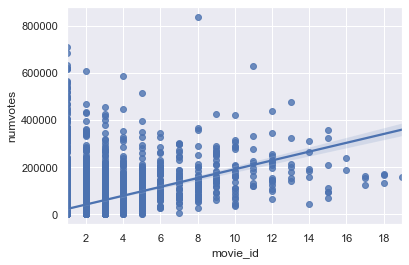

In [389]:
sns.regplot(x="movie_id",
            y="numvotes", 
            data=by_actor_df);

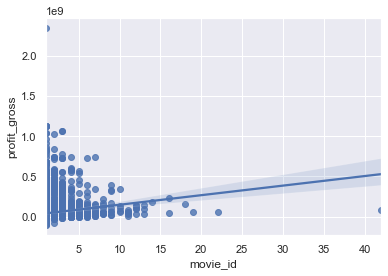

In [390]:
sns.regplot(x="movie_id",
            y="profit_gross", 
            data=by_director_df);

In [391]:
by_director_df.corr()

,runtime_minutes,numvotes,production_budget,worldwide_gross,profit_gross,movie_id
runtime_minutes,1.000000,0.329655,0.163206,0.116259,0.092696,0.140217
numvotes,0.329655,1.000000,0.470455,0.515501,0.485945,0.268916
production_budget,0.163206,0.470455,1.000000,0.781355,0.650165,0.159653
worldwide_gross,0.116259,0.515501,0.781355,1.000000,0.982186,0.155564
profit_gross,0.092696,0.485945,0.650165,0.982186,1.000000,0.141320
movie_id,0.140217,0.268916,0.159653,0.155564,0.141320,1.000000


In [380]:
by_actor_df.corr()

,runtime_minutes,numvotes,production_budget,worldwide_gross,profit_gross,movie_id
runtime_minutes,1.000000,0.243060,0.110851,0.082474,0.068712,0.160280
numvotes,0.243060,1.000000,0.403779,0.389411,0.358060,0.430595
production_budget,0.110851,0.403779,1.000000,0.754550,0.641425,0.217535
worldwide_gross,0.082474,0.389411,0.754550,1.000000,0.987447,0.152070
profit_gross,0.068712,0.358060,0.641425,0.987447,1.000000,0.125420
movie_id,0.160280,0.430595,0.217535,0.152070,0.125420,1.000000


<AxesSubplot:>

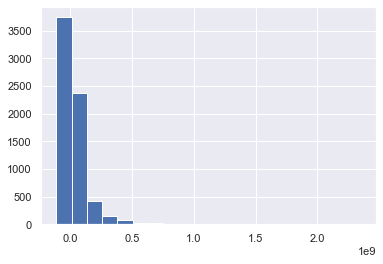

In [534]:
by_actor_df.profit_gross.hist(bins=20)

Possible Metrics: 

- Gross Raw Value (Could be split into domestic and global)

- Profit %

- Rating

- Vote count

- Popularity (tmdb)

Potential Indicators of Success:

- Actor

- Director

- Genre

- Budget

- Runtime

- Rating (G, PG, PG-13, R, etc)


# Andrew Yang